In [1]:
import sys
import os
import cv2 as cv
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from CoffeeNet.dataset.dataset import CoffeeDataset

In [3]:
import pandas as pd
import numpy as np

In [4]:
train_images_names = os.listdir('../data/processed/images/train/')
train_mask_names = os.listdir('../data/processed/annotations/train/')
# sort
train_mask_names = [image.split('.')[0]+"_mask.png" for image in train_images_names]

In [5]:
train_dataframe = pd.DataFrame({'images':train_images_names,'masks':train_mask_names})

In [6]:
train_dataframe['images'] = train_dataframe['images'].apply(lambda x: os.path.join('../data/processed/images/train/',x))

In [7]:
train_dataframe['masks'] = train_dataframe['masks'].apply(lambda x: os.path.join('../data/processed/annotations/train/',x))

In [8]:
train_dataframe.sample(20)

,images,masks
8,../data/processed/images/train/1743.jpg,../data/processed/annotations/train/1743_mask.png
155,../data/processed/images/train/1685.jpg,../data/processed/annotations/train/1685_mask.png
358,../data/processed/images/train/232.jpg,../data/processed/annotations/train/232_mask.png
354,../data/processed/images/train/555.jpg,../data/processed/annotations/train/555_mask.png
295,../data/processed/images/train/341.jpg,../data/processed/annotations/train/341_mask.png
305,../data/processed/images/train/750.jpg,../data/processed/annotations/train/750_mask.png
141,../data/processed/images/train/261.jpg,../data/processed/annotations/train/261_mask.png
281,../data/processed/images/train/508.jpg,../data/processed/annotations/train/508_mask.png
238,../data/processed/images/train/867.jpg,../data/processed/annotations/train/867_mask.png
127,../data/processed/images/train/699.jpg,../data/processed/annotations/train/699_mask.png


In [9]:
import json
with open('../data/external/annotations-info.json') as f:
    annotation_info = json.load(f)
annotation_info

{'background': [0, 0, 0], 'leaf': [0, 176, 0], 'symptom': [255, 0, 0]}

In [10]:
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.ToTensor(),transforms.Resize((256,256))])

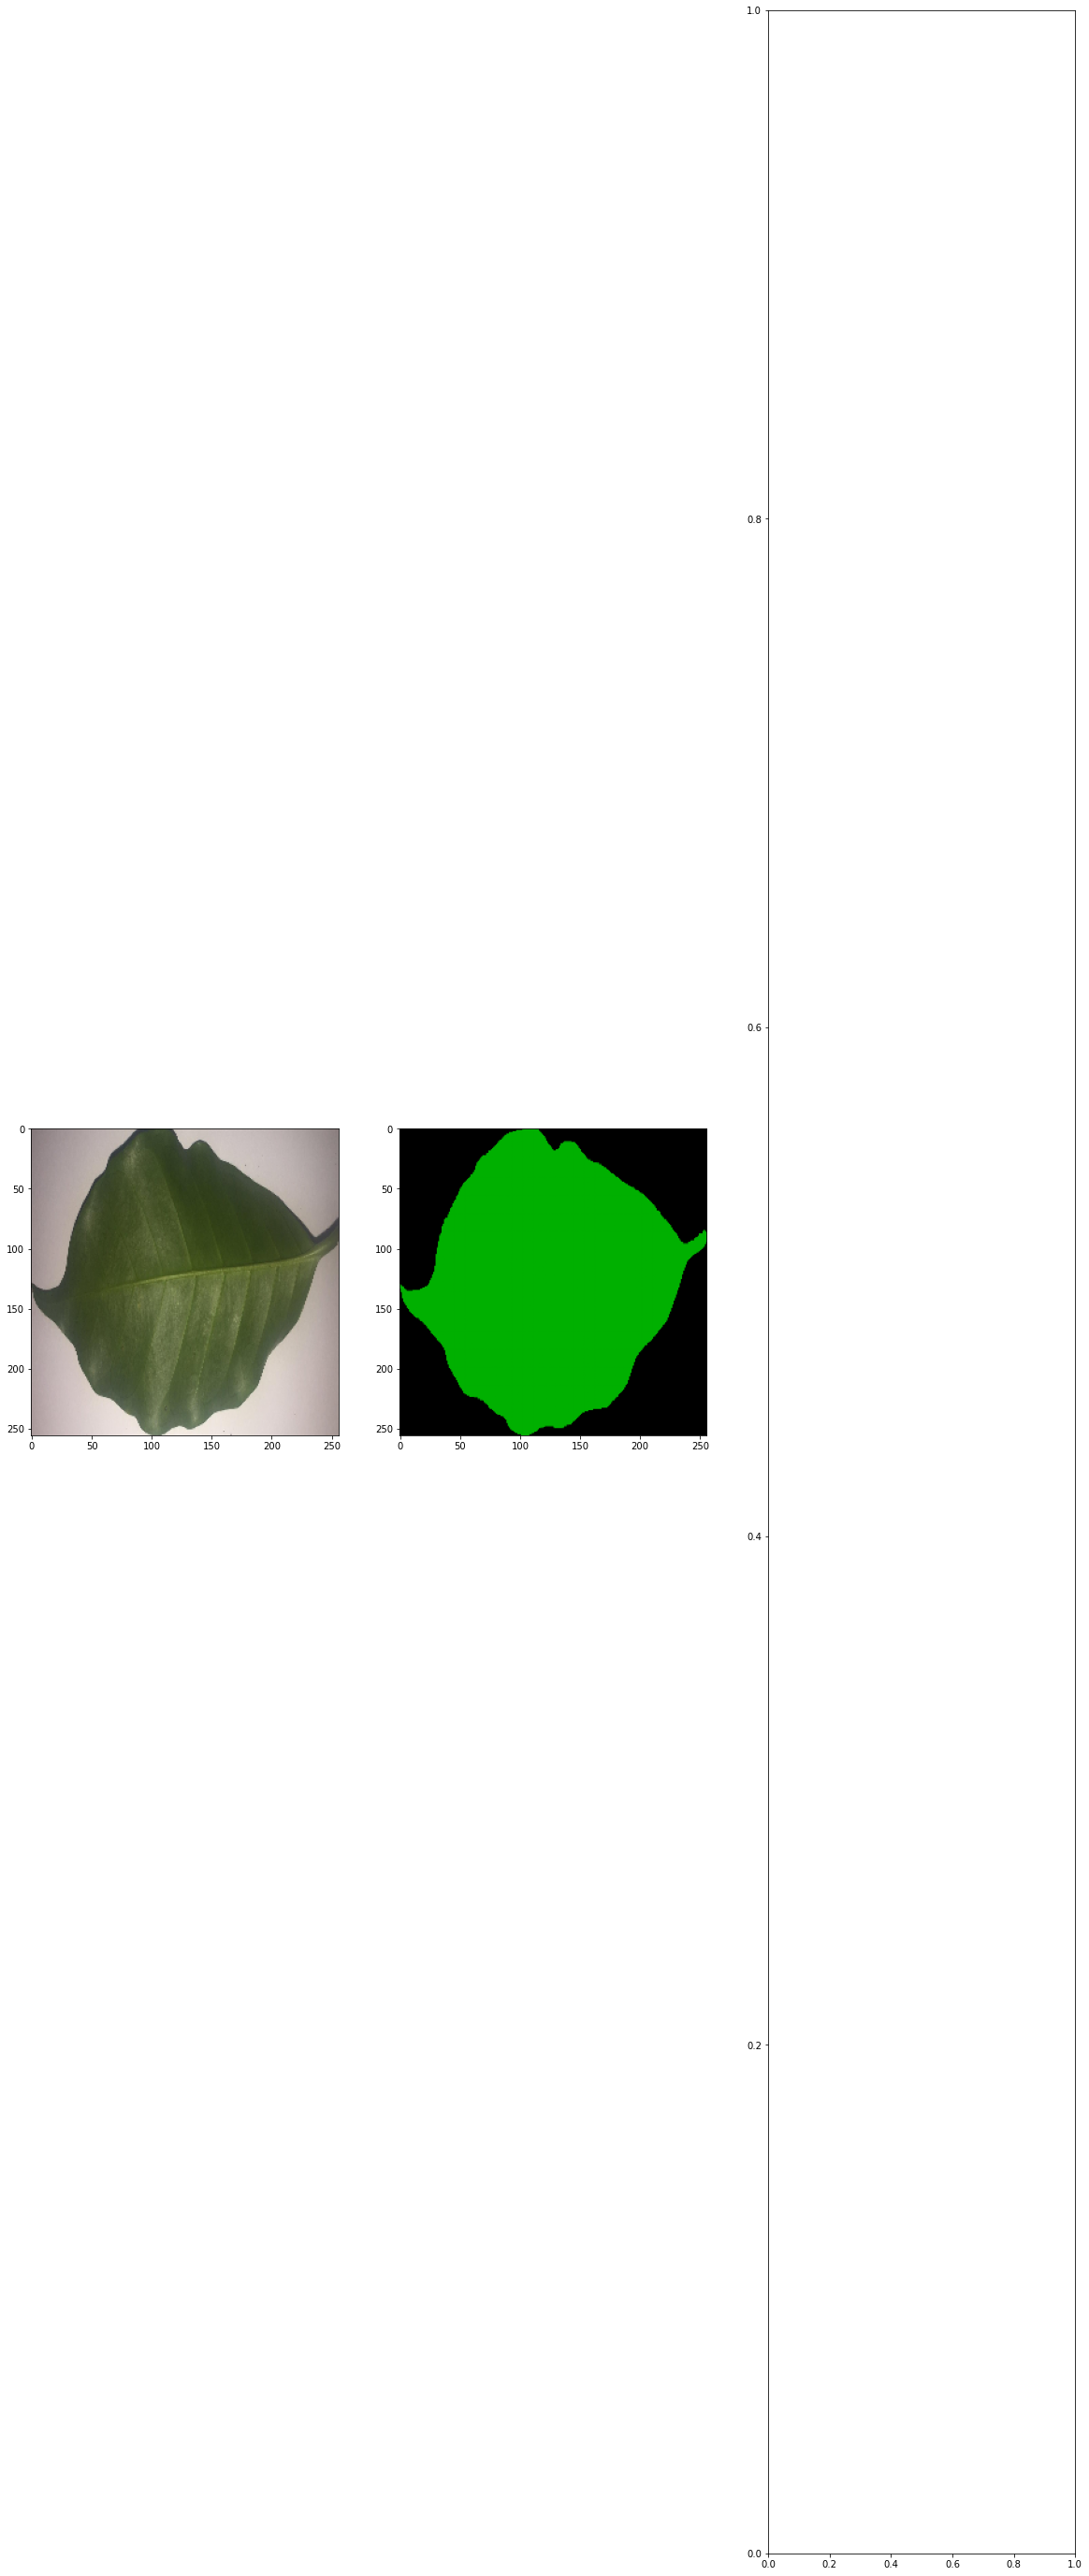

In [11]:
import random
img,mask = CoffeeDataset(train_dataframe,annotation_info,transform)[random.randint(0,len(train_dataframe)-1)]
fig,axs = plt.subplots(1,2,figsize=(20,50))
axs[0].imshow(img.permute(1,2,0))
axs[1].imshow(mask.permute(1,2,0),"gray")